In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,accuracy_score,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.cluster import KMeans

In [3]:
telecom_df=pd.read_csv('Telco_Customer_Churn_Data.csv')
telecom_df['TotalCharges']=pd.to_numeric(telecom_df['TotalCharges'],errors='coerce') # converting strings to numeric(change datatype)
telecom_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [4]:
telecom_df['SeniorCitizen']=telecom_df['SeniorCitizen'].astype(object) # change datatype
telecom_df['SeniorCitizen'].dtype

dtype('O')

In [5]:
telecom_df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [6]:
telecom_df.isnull().sum() # checking for missing values

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
# filling the missing values using mean
telecom_df['TotalCharges'].mean()
telecom_df['TotalCharges'].fillna(telecom_df['TotalCharges'].mean(), inplace=True)

In [8]:
telecom_df['TotalCharges'].isnull().sum()

0

In [9]:
telecom_df.drop('customerID', axis=1, inplace=True) # dropping the column with unique identifier


In [11]:
telecom_df.shape

(7043, 20)

In [12]:
# Categorical Columns list
tel_cat=[col for col in telecom_df.columns if telecom_df[col].dtype=='object']
tel_cat

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [13]:
# OneHot Encoding
pd.get_dummies(data=telecom_df, columns=['gender',
                          'SeniorCitizen',
                          'Partner',
                          'Dependents',
                          'PhoneService',
                          'MultipleLines',
                          'InternetService',
                          'OnlineSecurity',
                          'OnlineBackup',
                          'DeviceProtection',
                          'TechSupport',
                          'StreamingTV',
                          'StreamingMovies',
                          'Contract',
                          'PaperlessBilling',
                          'PaymentMethod'])

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,No,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,No,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,Yes,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,No,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,Yes,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,No,0,1,1,0,0,1,...,1,0,1,0,0,1,0,0,0,1
7039,72,103.20,7362.90,No,1,0,1,0,0,1,...,1,0,1,0,0,1,0,1,0,0
7040,11,29.60,346.45,No,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
7041,4,74.40,306.60,Yes,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1


In [14]:
# Continuous columns list
col_l1 = [col for col in telecom_df.columns if telecom_df[col].dtype=='int64'or  telecom_df[col].dtype=='float64']
col_l1

['tenure', 'MonthlyCharges', 'TotalCharges']

In [15]:
# chi2 contingency
p_values=[]
for col in tel_cat:
    contingency_table=pd.crosstab(tel_cat,telecom_df['Churn'])
    p_values.append(chi2_contingency(contingency_table)[1])
    
chi_df=pd.DataFrame({'Col_Name':tel_cat,'p_values':p_values})
chi_df

,Col_Name,p_values
0,gender,1.0
1,SeniorCitizen,1.0
2,Partner,1.0
3,Dependents,1.0
4,PhoneService,1.0
5,MultipleLines,1.0
6,InternetService,1.0
7,OnlineSecurity,1.0
8,OnlineBackup,1.0
9,DeviceProtection,1.0


In [16]:
telecom_df['tenure'].isnull().sum()

0

In [17]:
def anova(col): # col --> continuous variable
    
    #cat_list=list(y.value_counts().index)
    
    res=f_oneway(telecom_df[telecom_df['Churn']=='No'][col],telecom_df[telecom_df['Churn']=='Yes'][col])
    
    #res=f_oneway()
    return res
    
anova('tenure')

F_onewayResult(statistic=997.2680104991438, pvalue=7.999057960610892e-205)

In [18]:
telecom_df['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [19]:
telecom_df = telecom_df.replace({'Churn': {'Yes': 1,  'No': 0}})  # replacing yes & no with 1 & 0
telecom_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [20]:
# assigning the y variable to outputv variable and dropping the output variable from dataframe
y=telecom_df['Churn']
telecom_df.drop(columns='Churn', inplace=True)


In [21]:
# train test split
x_train,x_test,y_train,y_test=train_test_split(telecom_df,y, test_size=0.2, random_state=42)
x_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
185,Female,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.80
2715,Male,0,No,No,41,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45
3825,Female,0,Yes,Yes,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.70
1807,Female,0,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35
132,Male,0,No,No,67,Yes,No,DSL,No,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6366,Female,0,Yes,No,64,Yes,No,DSL,No,Yes,Yes,Yes,No,Yes,Two year,Yes,Mailed check,68.30,4378.80
315,Male,0,Yes,Yes,51,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,One year,No,Credit card (automatic),110.05,5686.40
2439,Male,0,Yes,Yes,17,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.90,329.75
5002,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,No,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.10


In [22]:
for col in x_train.columns:                     # filling missing values
    if x_train[col].dtype=='object':
        x_train[col]=x_train[col].fillna(x_train[col].mode()[0]).astype(object) # fill missing values with mode for object(categorical variables)
        x_test[col]=x_test[col].fillna(x_train[col].mode()[0]).astype(object)
        
    else:
        x_train[col]==x_train[col].fillna(x_train[col].mean()) # fill missing values with mean for continuous variables
        x_test[col]==x_test[col].fillna(x_train[col].mean())

In [23]:
x_train.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [24]:
tele_cat=[col for col in telecom_df.columns if telecom_df[col].dtype=='object']

In [25]:
one_hot_train=pd.get_dummies(x_train[tele_cat])   # OneHot encoding
one_hot_test=pd.get_dummies(x_test[tele_cat])
one_hot_train.shape
one_hot_test.shape
x_train_final,x_test_final=one_hot_train.align(one_hot_test,join='inner',axis=1,fill_value=0)# aligning train and test data
x_train_final.shape

(5634, 43)

In [26]:
scaler=StandardScaler()   # StandardScaler
std_scr=scaler.fit_transform(x_train[col_l1])
for col in col_l1:
    x_train[col]=scaler.fit_transform(np.array(x_train[col]).reshape(-1,1))
    x_test[col]=scaler.transform(np.array(x_test[col]).reshape(-1,1))


In [27]:
train = pd.concat([x_train[col_l1], x_train_final], axis = 1)   # concatenating columns list and categories list
test = pd.concat([x_test[col_l1], x_test_final], axis = 1)

In [28]:
# Decision Tree Classifier
tree=DecisionTreeClassifier()
tree.fit(train,y_train)
tree_predict=tree.predict(test)
score_test=tree.score(test,y_test)
score_train=tree.score(train,y_train)
print('F1 Score',f1_score(y_test,tree_predict))


F1 Score 0.46133682830930534


In [30]:
tree_proba=tree.predict_proba(test)
tr_prob=tree_proba[::,-1]
fpr_tree,tpr_tree,thresholds_tree=roc_curve(y_test,tr_prob)

In [31]:
# Random Forest Classifier
no_of_trees=list(range(50,200,50)) # creating a list of trees
accuracy=[]

for num in no_of_trees:
    forest=RandomForestClassifier(n_estimators=num,random_state=42)
    forest.fit(train,y_train)
    accuracy.append(forest.score(train,y_train))
    
no_of_trees

[50, 100, 150]

In [32]:
# HyperTuning (RandomForestClassifier)
param_dict={'n_estimators': no_of_trees,
           'max_depth':[4,6,8],
           'min_samples_split':[2,3,4],
           'max_features':['auto','sqrt','log2']}
gcv=GridSearchCV(forest, param_grid=param_dict, cv=5, verbose=5)
gcv.fit(train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] max_depth=4, max_features=auto, min_samples_split=2, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, max_features=auto, min_samples_split=2, n_estimators=50, score=0.807, total=   0.3s
[CV] max_depth=4, max_features=auto, min_samples_split=2, n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=4, max_features=auto, min_samples_split=2, n_estimators=50, score=0.791, total=   0.3s
[CV] max_depth=4, max_features=auto, min_samples_split=2, n_estimators=50 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  max_depth=4, max_features=auto, min_samples_split=2, n_estimators=50, score=0.779, total=   0.3s
[CV] max_depth=4, max_features=auto, min_samples_split=2, n_estimators=50 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s


[CV]  max_depth=4, max_features=auto, min_samples_split=2, n_estimators=50, score=0.793, total=   0.3s
[CV] max_depth=4, max_features=auto, min_samples_split=2, n_estimators=50 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.0s remaining:    0.0s


[CV]  max_depth=4, max_features=auto, min_samples_split=2, n_estimators=50, score=0.790, total=   0.3s
[CV] max_depth=4, max_features=auto, min_samples_split=2, n_estimators=100 
[CV]  max_depth=4, max_features=auto, min_samples_split=2, n_estimators=100, score=0.809, total=   0.5s
[CV] max_depth=4, max_features=auto, min_samples_split=2, n_estimators=100 
[CV]  max_depth=4, max_features=auto, min_samples_split=2, n_estimators=100, score=0.793, total=   0.5s
[CV] max_depth=4, max_features=auto, min_samples_split=2, n_estimators=100 
[CV]  max_depth=4, max_features=auto, min_samples_split=2, n_estimators=100, score=0.781, total=   0.5s
[CV] max_depth=4, max_features=auto, min_samples_split=2, n_estimators=100 
[CV]  max_depth=4, max_features=auto, min_samples_split=2, n_estimators=100, score=0.792, total=   0.5s
[CV] max_depth=4, max_features=auto, min_samples_split=2, n_estimators=100 
[CV]  max_depth=4, max_features=auto, min_samples_split=2, n_estimators=100, score=0.789, total=   0.

[CV]  max_depth=4, max_features=sqrt, min_samples_split=2, n_estimators=100, score=0.809, total=   0.5s
[CV] max_depth=4, max_features=sqrt, min_samples_split=2, n_estimators=100 
[CV]  max_depth=4, max_features=sqrt, min_samples_split=2, n_estimators=100, score=0.793, total=   0.5s
[CV] max_depth=4, max_features=sqrt, min_samples_split=2, n_estimators=100 
[CV]  max_depth=4, max_features=sqrt, min_samples_split=2, n_estimators=100, score=0.781, total=   0.5s
[CV] max_depth=4, max_features=sqrt, min_samples_split=2, n_estimators=100 
[CV]  max_depth=4, max_features=sqrt, min_samples_split=2, n_estimators=100, score=0.792, total=   0.5s
[CV] max_depth=4, max_features=sqrt, min_samples_split=2, n_estimators=100 
[CV]  max_depth=4, max_features=sqrt, min_samples_split=2, n_estimators=100, score=0.789, total=   0.5s
[CV] max_depth=4, max_features=sqrt, min_samples_split=2, n_estimators=150 
[CV]  max_depth=4, max_features=sqrt, min_samples_split=2, n_estimators=150, score=0.807, total=   0

[CV]  max_depth=4, max_features=log2, min_samples_split=2, n_estimators=100, score=0.783, total=   0.5s
[CV] max_depth=4, max_features=log2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=4, max_features=log2, min_samples_split=2, n_estimators=100, score=0.780, total=   0.4s
[CV] max_depth=4, max_features=log2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=4, max_features=log2, min_samples_split=2, n_estimators=100, score=0.790, total=   0.4s
[CV] max_depth=4, max_features=log2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=4, max_features=log2, min_samples_split=2, n_estimators=100, score=0.783, total=   0.4s
[CV] max_depth=4, max_features=log2, min_samples_split=2, n_estimators=150 
[CV]  max_depth=4, max_features=log2, min_samples_split=2, n_estimators=150, score=0.802, total=   0.7s
[CV] max_depth=4, max_features=log2, min_samples_split=2, n_estimators=150 
[CV]  max_depth=4, max_features=log2, min_samples_split=2, n_estimators=150, score=0.784, total=   0

[CV]  max_depth=6, max_features=auto, min_samples_split=2, n_estimators=100, score=0.777, total=   0.5s
[CV] max_depth=6, max_features=auto, min_samples_split=2, n_estimators=100 
[CV]  max_depth=6, max_features=auto, min_samples_split=2, n_estimators=100, score=0.790, total=   0.5s
[CV] max_depth=6, max_features=auto, min_samples_split=2, n_estimators=100 
[CV]  max_depth=6, max_features=auto, min_samples_split=2, n_estimators=100, score=0.792, total=   0.5s
[CV] max_depth=6, max_features=auto, min_samples_split=2, n_estimators=150 
[CV]  max_depth=6, max_features=auto, min_samples_split=2, n_estimators=150, score=0.811, total=   0.8s
[CV] max_depth=6, max_features=auto, min_samples_split=2, n_estimators=150 
[CV]  max_depth=6, max_features=auto, min_samples_split=2, n_estimators=150, score=0.808, total=   0.8s
[CV] max_depth=6, max_features=auto, min_samples_split=2, n_estimators=150 
[CV]  max_depth=6, max_features=auto, min_samples_split=2, n_estimators=150, score=0.781, total=   0

[CV]  max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=100, score=0.790, total=   0.5s
[CV] max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=100 
[CV]  max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=100, score=0.792, total=   0.5s
[CV] max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=150 
[CV]  max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=150, score=0.811, total=   0.8s
[CV] max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=150 
[CV]  max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=150, score=0.808, total=   0.8s
[CV] max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=150 
[CV]  max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=150, score=0.781, total=   0.8s
[CV] max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=150 
[CV]  max_depth=6, max_features=sqrt, min_samples_split=2, n_estimators=150, score=0.788, total=   0

[CV]  max_depth=6, max_features=log2, min_samples_split=2, n_estimators=100, score=0.798, total=   0.7s
[CV] max_depth=6, max_features=log2, min_samples_split=2, n_estimators=150 
[CV]  max_depth=6, max_features=log2, min_samples_split=2, n_estimators=150, score=0.809, total=   0.9s
[CV] max_depth=6, max_features=log2, min_samples_split=2, n_estimators=150 
[CV]  max_depth=6, max_features=log2, min_samples_split=2, n_estimators=150, score=0.799, total=   0.9s
[CV] max_depth=6, max_features=log2, min_samples_split=2, n_estimators=150 
[CV]  max_depth=6, max_features=log2, min_samples_split=2, n_estimators=150, score=0.787, total=   0.8s
[CV] max_depth=6, max_features=log2, min_samples_split=2, n_estimators=150 
[CV]  max_depth=6, max_features=log2, min_samples_split=2, n_estimators=150, score=0.788, total=   0.8s
[CV] max_depth=6, max_features=log2, min_samples_split=2, n_estimators=150 
[CV]  max_depth=6, max_features=log2, min_samples_split=2, n_estimators=150, score=0.798, total=   0

[CV]  max_depth=8, max_features=auto, min_samples_split=2, n_estimators=150, score=0.808, total=   1.0s
[CV] max_depth=8, max_features=auto, min_samples_split=2, n_estimators=150 
[CV]  max_depth=8, max_features=auto, min_samples_split=2, n_estimators=150, score=0.806, total=   1.0s
[CV] max_depth=8, max_features=auto, min_samples_split=2, n_estimators=150 
[CV]  max_depth=8, max_features=auto, min_samples_split=2, n_estimators=150, score=0.783, total=   1.0s
[CV] max_depth=8, max_features=auto, min_samples_split=2, n_estimators=150 
[CV]  max_depth=8, max_features=auto, min_samples_split=2, n_estimators=150, score=0.791, total=   1.0s
[CV] max_depth=8, max_features=auto, min_samples_split=2, n_estimators=150 
[CV]  max_depth=8, max_features=auto, min_samples_split=2, n_estimators=150, score=0.798, total=   0.9s
[CV] max_depth=8, max_features=auto, min_samples_split=3, n_estimators=50 
[CV]  max_depth=8, max_features=auto, min_samples_split=3, n_estimators=50, score=0.815, total=   0.3

[CV]  max_depth=8, max_features=sqrt, min_samples_split=2, n_estimators=150, score=0.806, total=   1.0s
[CV] max_depth=8, max_features=sqrt, min_samples_split=2, n_estimators=150 
[CV]  max_depth=8, max_features=sqrt, min_samples_split=2, n_estimators=150, score=0.783, total=   0.9s
[CV] max_depth=8, max_features=sqrt, min_samples_split=2, n_estimators=150 
[CV]  max_depth=8, max_features=sqrt, min_samples_split=2, n_estimators=150, score=0.791, total=   0.9s
[CV] max_depth=8, max_features=sqrt, min_samples_split=2, n_estimators=150 
[CV]  max_depth=8, max_features=sqrt, min_samples_split=2, n_estimators=150, score=0.798, total=   0.9s
[CV] max_depth=8, max_features=sqrt, min_samples_split=3, n_estimators=50 
[CV]  max_depth=8, max_features=sqrt, min_samples_split=3, n_estimators=50, score=0.815, total=   0.3s
[CV] max_depth=8, max_features=sqrt, min_samples_split=3, n_estimators=50 
[CV]  max_depth=8, max_features=sqrt, min_samples_split=3, n_estimators=50, score=0.807, total=   0.3s


[CV]  max_depth=8, max_features=log2, min_samples_split=2, n_estimators=150, score=0.784, total=   0.8s
[CV] max_depth=8, max_features=log2, min_samples_split=2, n_estimators=150 
[CV]  max_depth=8, max_features=log2, min_samples_split=2, n_estimators=150, score=0.792, total=   0.9s
[CV] max_depth=8, max_features=log2, min_samples_split=2, n_estimators=150 
[CV]  max_depth=8, max_features=log2, min_samples_split=2, n_estimators=150, score=0.801, total=   0.9s
[CV] max_depth=8, max_features=log2, min_samples_split=3, n_estimators=50 
[CV]  max_depth=8, max_features=log2, min_samples_split=3, n_estimators=50, score=0.811, total=   0.3s
[CV] max_depth=8, max_features=log2, min_samples_split=3, n_estimators=50 
[CV]  max_depth=8, max_features=log2, min_samples_split=3, n_estimators=50, score=0.811, total=   0.3s
[CV] max_depth=8, max_features=log2, min_samples_split=3, n_estimators=50 
[CV]  max_depth=8, max_features=log2, min_samples_split=3, n_estimators=50, score=0.791, total=   0.3s
[C

[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:  3.7min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=150,
                                              random_state=42),
             param_grid={'max_depth': [4, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 150]},
             verbose=5)

In [33]:
rscv=RandomizedSearchCV(forest,param_distributions=param_dict, cv=5, verbose=5, n_iter=300)
rscv.fit(train,y_train)
rscv.predict(test)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] n_estimators=50, min_samples_split=2, max_features=auto, max_depth=4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=50, min_samples_split=2, max_features=auto, max_depth=4, score=0.807, total=   0.3s
[CV] n_estimators=50, min_samples_split=2, max_features=auto, max_depth=4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  n_estimators=50, min_samples_split=2, max_features=auto, max_depth=4, score=0.791, total=   0.2s
[CV] n_estimators=50, min_samples_split=2, max_features=auto, max_depth=4 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  n_estimators=50, min_samples_split=2, max_features=auto, max_depth=4, score=0.779, total=   0.2s
[CV] n_estimators=50, min_samples_split=2, max_features=auto, max_depth=4 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s


[CV]  n_estimators=50, min_samples_split=2, max_features=auto, max_depth=4, score=0.793, total=   0.2s
[CV] n_estimators=50, min_samples_split=2, max_features=auto, max_depth=4 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.9s remaining:    0.0s


[CV]  n_estimators=50, min_samples_split=2, max_features=auto, max_depth=4, score=0.790, total=   0.2s
[CV] n_estimators=100, min_samples_split=2, max_features=auto, max_depth=4 
[CV]  n_estimators=100, min_samples_split=2, max_features=auto, max_depth=4, score=0.809, total=   0.5s
[CV] n_estimators=100, min_samples_split=2, max_features=auto, max_depth=4 
[CV]  n_estimators=100, min_samples_split=2, max_features=auto, max_depth=4, score=0.793, total=   0.5s
[CV] n_estimators=100, min_samples_split=2, max_features=auto, max_depth=4 
[CV]  n_estimators=100, min_samples_split=2, max_features=auto, max_depth=4, score=0.781, total=   0.5s
[CV] n_estimators=100, min_samples_split=2, max_features=auto, max_depth=4 
[CV]  n_estimators=100, min_samples_split=2, max_features=auto, max_depth=4, score=0.792, total=   0.5s
[CV] n_estimators=100, min_samples_split=2, max_features=auto, max_depth=4 
[CV]  n_estimators=100, min_samples_split=2, max_features=auto, max_depth=4, score=0.789, total=   0.

[CV]  n_estimators=100, min_samples_split=2, max_features=sqrt, max_depth=4, score=0.809, total=   0.5s
[CV] n_estimators=100, min_samples_split=2, max_features=sqrt, max_depth=4 
[CV]  n_estimators=100, min_samples_split=2, max_features=sqrt, max_depth=4, score=0.793, total=   0.5s
[CV] n_estimators=100, min_samples_split=2, max_features=sqrt, max_depth=4 
[CV]  n_estimators=100, min_samples_split=2, max_features=sqrt, max_depth=4, score=0.781, total=   0.5s
[CV] n_estimators=100, min_samples_split=2, max_features=sqrt, max_depth=4 
[CV]  n_estimators=100, min_samples_split=2, max_features=sqrt, max_depth=4, score=0.792, total=   0.5s
[CV] n_estimators=100, min_samples_split=2, max_features=sqrt, max_depth=4 
[CV]  n_estimators=100, min_samples_split=2, max_features=sqrt, max_depth=4, score=0.789, total=   0.4s
[CV] n_estimators=150, min_samples_split=2, max_features=sqrt, max_depth=4 
[CV]  n_estimators=150, min_samples_split=2, max_features=sqrt, max_depth=4, score=0.807, total=   0

[CV]  n_estimators=100, min_samples_split=2, max_features=log2, max_depth=4, score=0.783, total=   0.4s
[CV] n_estimators=100, min_samples_split=2, max_features=log2, max_depth=4 
[CV]  n_estimators=100, min_samples_split=2, max_features=log2, max_depth=4, score=0.780, total=   0.4s
[CV] n_estimators=100, min_samples_split=2, max_features=log2, max_depth=4 
[CV]  n_estimators=100, min_samples_split=2, max_features=log2, max_depth=4, score=0.790, total=   0.4s
[CV] n_estimators=100, min_samples_split=2, max_features=log2, max_depth=4 
[CV]  n_estimators=100, min_samples_split=2, max_features=log2, max_depth=4, score=0.783, total=   0.4s
[CV] n_estimators=150, min_samples_split=2, max_features=log2, max_depth=4 
[CV]  n_estimators=150, min_samples_split=2, max_features=log2, max_depth=4, score=0.802, total=   0.6s
[CV] n_estimators=150, min_samples_split=2, max_features=log2, max_depth=4 
[CV]  n_estimators=150, min_samples_split=2, max_features=log2, max_depth=4, score=0.784, total=   0

[CV]  n_estimators=100, min_samples_split=2, max_features=auto, max_depth=6, score=0.777, total=   0.6s
[CV] n_estimators=100, min_samples_split=2, max_features=auto, max_depth=6 
[CV]  n_estimators=100, min_samples_split=2, max_features=auto, max_depth=6, score=0.790, total=   0.5s
[CV] n_estimators=100, min_samples_split=2, max_features=auto, max_depth=6 
[CV]  n_estimators=100, min_samples_split=2, max_features=auto, max_depth=6, score=0.792, total=   0.5s
[CV] n_estimators=150, min_samples_split=2, max_features=auto, max_depth=6 
[CV]  n_estimators=150, min_samples_split=2, max_features=auto, max_depth=6, score=0.811, total=   0.8s
[CV] n_estimators=150, min_samples_split=2, max_features=auto, max_depth=6 
[CV]  n_estimators=150, min_samples_split=2, max_features=auto, max_depth=6, score=0.808, total=   0.8s
[CV] n_estimators=150, min_samples_split=2, max_features=auto, max_depth=6 
[CV]  n_estimators=150, min_samples_split=2, max_features=auto, max_depth=6, score=0.781, total=   0

[CV]  n_estimators=100, min_samples_split=2, max_features=sqrt, max_depth=6, score=0.790, total=   0.5s
[CV] n_estimators=100, min_samples_split=2, max_features=sqrt, max_depth=6 
[CV]  n_estimators=100, min_samples_split=2, max_features=sqrt, max_depth=6, score=0.792, total=   0.5s
[CV] n_estimators=150, min_samples_split=2, max_features=sqrt, max_depth=6 
[CV]  n_estimators=150, min_samples_split=2, max_features=sqrt, max_depth=6, score=0.811, total=   0.8s
[CV] n_estimators=150, min_samples_split=2, max_features=sqrt, max_depth=6 
[CV]  n_estimators=150, min_samples_split=2, max_features=sqrt, max_depth=6, score=0.808, total=   0.8s
[CV] n_estimators=150, min_samples_split=2, max_features=sqrt, max_depth=6 
[CV]  n_estimators=150, min_samples_split=2, max_features=sqrt, max_depth=6, score=0.781, total=   0.8s
[CV] n_estimators=150, min_samples_split=2, max_features=sqrt, max_depth=6 
[CV]  n_estimators=150, min_samples_split=2, max_features=sqrt, max_depth=6, score=0.788, total=   0

[CV]  n_estimators=100, min_samples_split=2, max_features=log2, max_depth=6, score=0.798, total=   0.5s
[CV] n_estimators=150, min_samples_split=2, max_features=log2, max_depth=6 
[CV]  n_estimators=150, min_samples_split=2, max_features=log2, max_depth=6, score=0.809, total=   0.7s
[CV] n_estimators=150, min_samples_split=2, max_features=log2, max_depth=6 
[CV]  n_estimators=150, min_samples_split=2, max_features=log2, max_depth=6, score=0.799, total=   0.7s
[CV] n_estimators=150, min_samples_split=2, max_features=log2, max_depth=6 
[CV]  n_estimators=150, min_samples_split=2, max_features=log2, max_depth=6, score=0.787, total=   0.8s
[CV] n_estimators=150, min_samples_split=2, max_features=log2, max_depth=6 
[CV]  n_estimators=150, min_samples_split=2, max_features=log2, max_depth=6, score=0.788, total=   0.8s
[CV] n_estimators=150, min_samples_split=2, max_features=log2, max_depth=6 
[CV]  n_estimators=150, min_samples_split=2, max_features=log2, max_depth=6, score=0.798, total=   0

[CV]  n_estimators=150, min_samples_split=2, max_features=auto, max_depth=8, score=0.808, total=   0.9s
[CV] n_estimators=150, min_samples_split=2, max_features=auto, max_depth=8 
[CV]  n_estimators=150, min_samples_split=2, max_features=auto, max_depth=8, score=0.806, total=   0.9s
[CV] n_estimators=150, min_samples_split=2, max_features=auto, max_depth=8 
[CV]  n_estimators=150, min_samples_split=2, max_features=auto, max_depth=8, score=0.783, total=   0.9s
[CV] n_estimators=150, min_samples_split=2, max_features=auto, max_depth=8 
[CV]  n_estimators=150, min_samples_split=2, max_features=auto, max_depth=8, score=0.791, total=   0.9s
[CV] n_estimators=150, min_samples_split=2, max_features=auto, max_depth=8 
[CV]  n_estimators=150, min_samples_split=2, max_features=auto, max_depth=8, score=0.798, total=   0.9s
[CV] n_estimators=50, min_samples_split=3, max_features=auto, max_depth=8 
[CV]  n_estimators=50, min_samples_split=3, max_features=auto, max_depth=8, score=0.815, total=   0.3

[CV]  n_estimators=150, min_samples_split=2, max_features=sqrt, max_depth=8, score=0.806, total=   0.9s
[CV] n_estimators=150, min_samples_split=2, max_features=sqrt, max_depth=8 
[CV]  n_estimators=150, min_samples_split=2, max_features=sqrt, max_depth=8, score=0.783, total=   0.9s
[CV] n_estimators=150, min_samples_split=2, max_features=sqrt, max_depth=8 
[CV]  n_estimators=150, min_samples_split=2, max_features=sqrt, max_depth=8, score=0.791, total=   0.9s
[CV] n_estimators=150, min_samples_split=2, max_features=sqrt, max_depth=8 
[CV]  n_estimators=150, min_samples_split=2, max_features=sqrt, max_depth=8, score=0.798, total=   0.9s
[CV] n_estimators=50, min_samples_split=3, max_features=sqrt, max_depth=8 
[CV]  n_estimators=50, min_samples_split=3, max_features=sqrt, max_depth=8, score=0.815, total=   0.3s
[CV] n_estimators=50, min_samples_split=3, max_features=sqrt, max_depth=8 
[CV]  n_estimators=50, min_samples_split=3, max_features=sqrt, max_depth=8, score=0.807, total=   0.3s


[CV]  n_estimators=150, min_samples_split=2, max_features=log2, max_depth=8, score=0.784, total=   0.8s
[CV] n_estimators=150, min_samples_split=2, max_features=log2, max_depth=8 
[CV]  n_estimators=150, min_samples_split=2, max_features=log2, max_depth=8, score=0.792, total=   0.9s
[CV] n_estimators=150, min_samples_split=2, max_features=log2, max_depth=8 
[CV]  n_estimators=150, min_samples_split=2, max_features=log2, max_depth=8, score=0.801, total=   0.9s
[CV] n_estimators=50, min_samples_split=3, max_features=log2, max_depth=8 
[CV]  n_estimators=50, min_samples_split=3, max_features=log2, max_depth=8, score=0.811, total=   0.3s
[CV] n_estimators=50, min_samples_split=3, max_features=log2, max_depth=8 
[CV]  n_estimators=50, min_samples_split=3, max_features=log2, max_depth=8, score=0.811, total=   0.3s
[CV] n_estimators=50, min_samples_split=3, max_features=log2, max_depth=8 
[CV]  n_estimators=50, min_samples_split=3, max_features=log2, max_depth=8, score=0.791, total=   0.3s
[C

[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:  3.6min finished


array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

Text(0.5, 1.0, 'Random Forest')

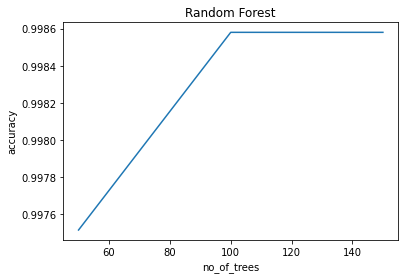

In [34]:
plt.plot(no_of_trees,accuracy)
plt.xlabel('no_of_trees')
plt.ylabel('accuracy')
plt.title('Random Forest')

In [35]:
# AdaBoost 
lr=np.arange(0.2,1.0,0.2)
accuracy1=[]
for num in lr:
    boost_class=AdaBoostClassifier(learning_rate=num)
    boost_class.fit(train,y_train)
    accuracy1.append(boost_class.score(train,y_train))

In [36]:
no_of_estimators=list(range(10,200,50))
accu=[]
for x in no_of_estimators:

    boost_class=AdaBoostClassifier(n_estimators=x)
    boost_class.fit(train,y_train)
    accu.append(boost_class.score(train,y_train))
    


Text(0, 0.5, 'Accuracy')

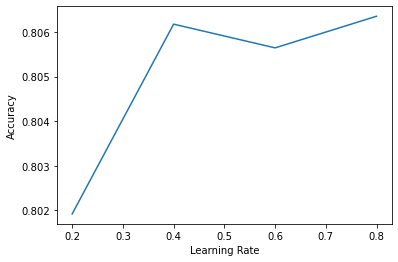

In [37]:
plt.plot(lr,accuracy1)
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')

In [38]:
log_reg=LogisticRegression() # logistic regression
log_reg.fit(train,y_train)
predictions=log_reg.predict(test)
pred_pro=log_reg.predict_proba(test)

In [39]:
print('Confusion Matrix',confusion_matrix(y_test,predictions))
print('Recall Score',recall_score(y_test,predictions))
print('Precision Score',precision_score(y_test,predictions))
print('Accuracy Score',accuracy_score(y_test,predictions))
print('F1 Score',f1_score(y_test,predictions))
pos_pred=pred_pro[::,-1]

fpr,tpr,thresholds=roc_curve(y_test,pos_pred)

Confusion Matrix [[934 102]
 [149 224]]
Recall Score 0.6005361930294906
Precision Score 0.6871165644171779
Accuracy Score 0.8218594748048261
F1 Score 0.6409155937052933


0.751040297286946

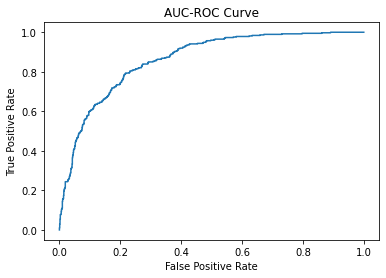

In [40]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
roc_auc_score(y_test,predictions)

In [41]:
# GradientBoost with hyperparameter tuning (GridSearchCV)
GBC=GradientBoostingClassifier(random_state=42)

In [42]:
pa_dict={'n_estimators':[10,20,30,25],
        'learning_rate':[0.1,0.02,0.5,1],
        'max_features':['auto','sqrt','log2']}

In [43]:
gcv1=GridSearchCV(GBC, param_grid=pa_dict, cv=5, verbose=5)
gcv1.fit(train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] learning_rate=0.1, max_features=auto, n_estimators=10 ...........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.1, max_features=auto, n_estimators=10, score=0.784, total=   0.3s
[CV] learning_rate=0.1, max_features=auto, n_estimators=10 ...........
[CV]  learning_rate=0.1, max_features=auto, n_estimators=10, score=0.777, total=   0.1s
[CV] learning_rate=0.1, max_features=auto, n_estimators=10 ...........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  learning_rate=0.1, max_features=auto, n_estimators=10, score=0.764, total=   0.2s
[CV] learning_rate=0.1, max_features=auto, n_estimators=10 ...........
[CV]  learning_rate=0.1, max_features=auto, n_estimators=10, score=0.780, total=   0.2s
[CV] learning_rate=0.1, max_features=auto, n_estimators=10 ...........


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.7s remaining:    0.0s


[CV]  learning_rate=0.1, max_features=auto, n_estimators=10, score=0.778, total=   0.1s
[CV] learning_rate=0.1, max_features=auto, n_estimators=20 ...........
[CV]  learning_rate=0.1, max_features=auto, n_estimators=20, score=0.807, total=   0.3s
[CV] learning_rate=0.1, max_features=auto, n_estimators=20 ...........
[CV]  learning_rate=0.1, max_features=auto, n_estimators=20, score=0.799, total=   0.3s
[CV] learning_rate=0.1, max_features=auto, n_estimators=20 ...........
[CV]  learning_rate=0.1, max_features=auto, n_estimators=20, score=0.775, total=   0.3s
[CV] learning_rate=0.1, max_features=auto, n_estimators=20 ...........
[CV]  learning_rate=0.1, max_features=auto, n_estimators=20, score=0.784, total=   0.3s
[CV] learning_rate=0.1, max_features=auto, n_estimators=20 ...........
[CV]  learning_rate=0.1, max_features=auto, n_estimators=20, score=0.794, total=   0.3s
[CV] learning_rate=0.1, max_features=auto, n_estimators=30 ...........
[CV]  learning_rate=0.1, max_features=auto, n_

[CV]  learning_rate=0.1, max_features=log2, n_estimators=25, score=0.785, total=   0.1s
[CV] learning_rate=0.1, max_features=log2, n_estimators=25 ...........
[CV]  learning_rate=0.1, max_features=log2, n_estimators=25, score=0.797, total=   0.1s
[CV] learning_rate=0.02, max_features=auto, n_estimators=10 ..........
[CV]  learning_rate=0.02, max_features=auto, n_estimators=10, score=0.735, total=   0.1s
[CV] learning_rate=0.02, max_features=auto, n_estimators=10 ..........
[CV]  learning_rate=0.02, max_features=auto, n_estimators=10, score=0.735, total=   0.2s
[CV] learning_rate=0.02, max_features=auto, n_estimators=10 ..........
[CV]  learning_rate=0.02, max_features=auto, n_estimators=10, score=0.735, total=   0.2s
[CV] learning_rate=0.02, max_features=auto, n_estimators=10 ..........
[CV]  learning_rate=0.02, max_features=auto, n_estimators=10, score=0.734, total=   0.1s
[CV] learning_rate=0.02, max_features=auto, n_estimators=10 ..........
[CV]  learning_rate=0.02, max_features=aut

[CV]  learning_rate=0.02, max_features=log2, n_estimators=30, score=0.735, total=   0.1s
[CV] learning_rate=0.02, max_features=log2, n_estimators=30 ..........
[CV]  learning_rate=0.02, max_features=log2, n_estimators=30, score=0.735, total=   0.1s
[CV] learning_rate=0.02, max_features=log2, n_estimators=30 ..........
[CV]  learning_rate=0.02, max_features=log2, n_estimators=30, score=0.735, total=   0.1s
[CV] learning_rate=0.02, max_features=log2, n_estimators=30 ..........
[CV]  learning_rate=0.02, max_features=log2, n_estimators=30, score=0.734, total=   0.1s
[CV] learning_rate=0.02, max_features=log2, n_estimators=30 ..........
[CV]  learning_rate=0.02, max_features=log2, n_estimators=30, score=0.734, total=   0.1s
[CV] learning_rate=0.02, max_features=log2, n_estimators=25 ..........
[CV]  learning_rate=0.02, max_features=log2, n_estimators=25, score=0.735, total=   0.1s
[CV] learning_rate=0.02, max_features=log2, n_estimators=25 ..........
[CV]  learning_rate=0.02, max_features=l

[CV]  learning_rate=0.5, max_features=log2, n_estimators=10, score=0.785, total=   0.0s
[CV] learning_rate=0.5, max_features=log2, n_estimators=10 ...........
[CV]  learning_rate=0.5, max_features=log2, n_estimators=10, score=0.798, total=   0.1s
[CV] learning_rate=0.5, max_features=log2, n_estimators=20 ...........
[CV]  learning_rate=0.5, max_features=log2, n_estimators=20, score=0.813, total=   0.1s
[CV] learning_rate=0.5, max_features=log2, n_estimators=20 ...........
[CV]  learning_rate=0.5, max_features=log2, n_estimators=20, score=0.799, total=   0.1s
[CV] learning_rate=0.5, max_features=log2, n_estimators=20 ...........
[CV]  learning_rate=0.5, max_features=log2, n_estimators=20, score=0.783, total=   0.1s
[CV] learning_rate=0.5, max_features=log2, n_estimators=20 ...........
[CV]  learning_rate=0.5, max_features=log2, n_estimators=20, score=0.784, total=   0.1s
[CV] learning_rate=0.5, max_features=log2, n_estimators=20 ...........
[CV]  learning_rate=0.5, max_features=log2, n_

[CV]  learning_rate=1, max_features=sqrt, n_estimators=25, score=0.813, total=   0.1s
[CV] learning_rate=1, max_features=sqrt, n_estimators=25 .............
[CV]  learning_rate=1, max_features=sqrt, n_estimators=25, score=0.785, total=   0.1s
[CV] learning_rate=1, max_features=sqrt, n_estimators=25 .............
[CV]  learning_rate=1, max_features=sqrt, n_estimators=25, score=0.776, total=   0.1s
[CV] learning_rate=1, max_features=sqrt, n_estimators=25 .............
[CV]  learning_rate=1, max_features=sqrt, n_estimators=25, score=0.782, total=   0.1s
[CV] learning_rate=1, max_features=sqrt, n_estimators=25 .............
[CV]  learning_rate=1, max_features=sqrt, n_estimators=25, score=0.781, total=   0.1s
[CV] learning_rate=1, max_features=log2, n_estimators=10 .............
[CV]  learning_rate=1, max_features=log2, n_estimators=10, score=0.793, total=   0.0s
[CV] learning_rate=1, max_features=log2, n_estimators=10 .............
[CV]  learning_rate=1, max_features=log2, n_estimators=10,

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   38.5s finished


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.1, 0.02, 0.5, 1],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 20, 30, 25]},
             verbose=5)

In [44]:
gcv1_pred=gcv1.predict(test)

In [45]:
print('Confusion Matrix', confusion_matrix(y_test,gcv1_pred))
print('Accuracy', accuracy_score(y_test,gcv1_pred))
print('Recall Score', recall_score(y_test,gcv1_pred))
print('Precission Score', precision_score(y_test,gcv1_pred))
print('F1 Score', f1_score(y_test,gcv1_pred))

Confusion Matrix [[954  82]
 [185 188]]
Accuracy 0.8105039034776437
Recall Score 0.5040214477211796
Precission Score 0.6962962962962963
F1 Score 0.5847589424572318


In [46]:
#Gaussian NaiveBayes Classifier
gaussian=GaussianNB()
gaussian.fit(train,y_train)
gnb_pred=gaussian.predict(test)

In [47]:
gaussian_f1=f1_score(y_test,gnb_pred)

In [29]:
# K means Clustering
num_clusters=range(2,11)
wss=[]
for n in num_clusters:
    kmeans=KMeans(n_clusters=n)
    kmeans.fit(train)
    wss.append(kmeans.inertia_)

Text(0, 0.5, 'WSS')

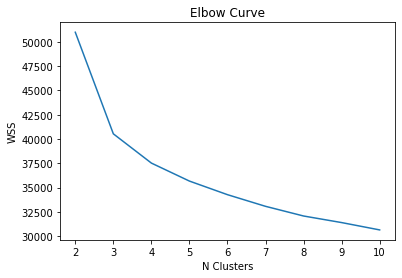

In [30]:
plt.plot(num_clusters,wss)
plt.title('Elbow Curve')
plt.xlabel('N Clusters')
plt.ylabel('WSS')
